In [7]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mtplt
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
import chardet
pyLDAvis.enable_notebook()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /Users/aishwarya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
with open('../data/nlp_vader_textblob_classified_data.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
tweetData = pd.read_csv('../data/nlp_vader_textblob_classified_data.csv', encoding = enc['encoding'], index_col=False)
tweetData

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,...,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,HuyThanhNguyen5,False,0,@unitedstandmufc @markgoldbridge get ole again...,-1.0,2022-08-31 15:12:54,India,0,0,0,...,0.046,0.819,0.134,0.7133,g e t o l e a g a i n t o t e l l ...,-1,0.600000,0.290000,1,-1
1,guaslackjack,False,125,best goal: bruno top assists: pogba ??: cristi...,1.0,2021-09-11 15:56:21,India,0,0,0,...,0.000,0.561,0.439,0.8225,b e s t g o a l : b r u n o t o p a s ...,1,0.400000,0.533333,1,1
2,gerryrb,False,935,@lost_souls_07 @kayinfinite28 @altyred2 @utdpl...,0.0,2022-09-03 14:29:34,Argentina,1,0,1,...,0.000,0.505,0.495,0.9562,i d o n o t k n o w i s t h ...,1,0.783333,0.450000,1,0
3,rickitten_,False,9,players spurs in old trafford #mufc #muntot ht...,0.0,2022-03-12 19:14:18,India,0,0,0,...,0.000,1.000,0.000,0.0000,p l a y e r s s p u r s i n o l d t r ...,0,0.200000,0.100000,1,0
4,saboteurDS,False,278,@tancredipalmeri why on earth would #mufc pay ...,-1.0,2022-08-28 12:07:34,India,0,0,2,...,0.045,0.643,0.312,0.8072,w h y o n e a r t h w o u l d p a ...,-1,0.500000,0.500000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97393,ChelseaEleven,False,21757,"thank you for everything, Thomas Tuchel #CFC #...",NaN,2022-09-07 09:09:44+00:00,India,0,1,4,...,0.000,0.667,0.333,0.3612,t h a n k y o u f o r e v e r y t h i n ...,1,0.000000,0.000000,0,1
97394,amber_chelsea,False,2195,@Chukwuemekaa10 thanks for the pic Carney ????...,NaN,2022-08-27 13:17:33+00:00,Zimbabwe,0,0,4,...,0.000,0.580,0.420,0.4404,t h a n k s f o r t h e p i c c a r ...,1,0.200000,0.200000,1,1
97395,Dc_Solomon2,False,143,Contacts ongoing between Chelsea and Brighton ...,NaN,2022-09-07 11:25:44+00:00,Zimbabwe,0,0,1,...,0.000,1.000,0.000,0.0000,c o n t a c t s o n g o i n g b e t w e e ...,0,0.400000,0.400000,1,0
97396,Marcus_Bryan_,False,5439,Billy Gilmour left #ChelseaFC to join Brighton...,NaN,2022-09-08 16:43:30+00:00,Argentina,1,2,24,...,0.000,0.805,0.195,0.5574,b i l l y g i l m o u r l e f t t o ...,1,0.035897,0.000000,0,1


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

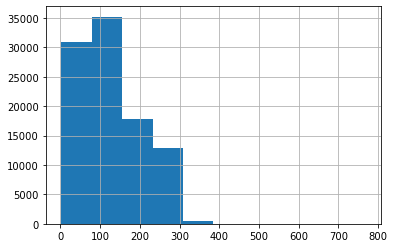

In [9]:
tweetData['content'].str.len().hist()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

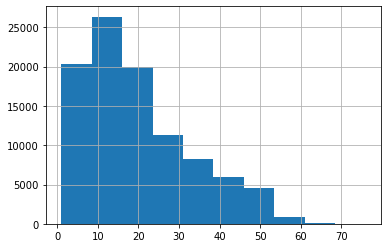

In [10]:
tweetData['content'].str.split().map(lambda x: len(x)).hist()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

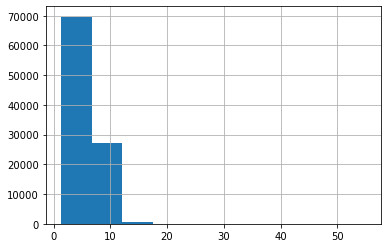

In [11]:
tweetData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [12]:
stop=set(stopwords.words('english'))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


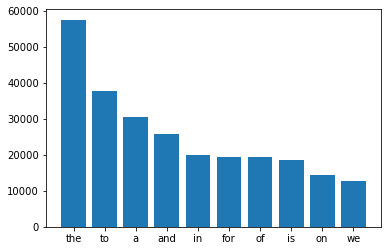

In [13]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= tweetData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

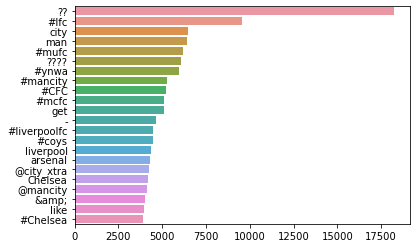

In [14]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

In [15]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sb.barplot(x=y,y=x)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


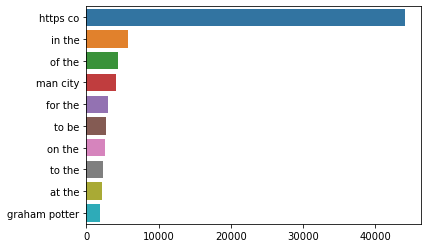

In [16]:
plot_top_ngrams_barchart(tweetData['content'],2)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


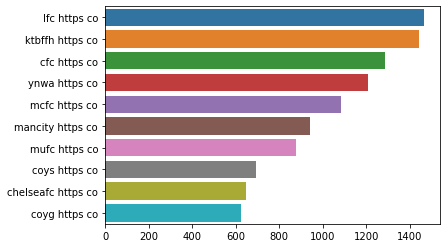

In [17]:
plot_top_ngrams_barchart(tweetData['content'],3)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


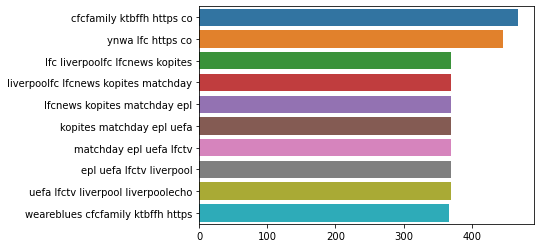

In [18]:
plot_top_ngrams_barchart(tweetData['content'],4)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


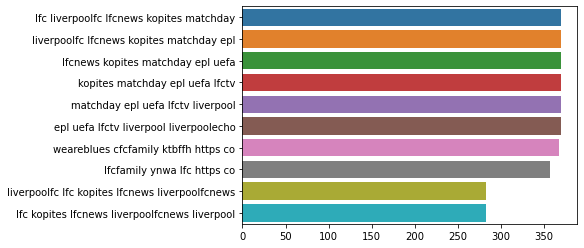

In [19]:
plot_top_ngrams_barchart(tweetData['content'],5)

In [20]:
# The output of the following cells are interactable - to give a better idea of the dataset
def get_lda_objects(text):
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
lda_model, bow_corpus, dic = get_lda_objects(tweetData['content'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aishwarya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
lda_model.show_topics()


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.019*"arsenal" + 0.017*"game" + 0.014*"n\'t" + 0.014*"team" + 0.013*"get" + 0.013*"season" + 0.011*"like" + 0.011*"time" + 0.010*"win" + 0.010*"need"'),
 (1,
  '0.070*"coys" + 0.061*"http" + 0.036*"thfc" + 0.034*"spur" + 0.032*"tottenham" + 0.011*"nld" + 0.011*"arsenal" + 0.011*"ttid" + 0.010*"totars" + 0.010*"transfer"'),
 (2,
  '0.114*"http" + 0.027*"ynwa" + 0.026*"lfc" + 0.019*"arsenal" + 0.016*"coyg" + 0.013*"anfield" + 0.012*"day" + 0.012*"liverpool" + 0.011*"red" + 0.011*"come"'),
 (3,
  '0.051*"goal" + 0.029*"kane" + 0.015*"totliv" + 0.014*"score" + 0.012*"arsmun" + 0.009*"totche" + 0.009*"harry" + 0.008*"scored" + 0.008*"var" + 0.008*"arsenal"'),
 (4,
  '0.067*"Chelsea" + 0.052*"http" + 0.039*"CFC" + 0.037*"ChelseaFC" + 0.022*"Tuchel" + 0.022*"KTBFFH" + 0.022*"Potter" + 0.014*"Graham" + 0.012*"manager" + 0.009*"cfc"'),
 (5,
  '0.039*"united" + 0.038*"mufc" + 0.031*"manutd" + 0.021*"ktbffh" + 0.017*"manchesterunited" + 0.015*"manchester" + 0.014*"glazersout" + 0.012*"ro

In [23]:
# Can adjust the metric value, as well as the topics
plot_lda_vis(lda_model, bow_corpus, dic)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.190196 -0.198049       1        1  26.303337
4      0.202220 -0.172351       2        1  15.404906
8      0.125916  0.168268       3        1  14.503602
2      0.167099  0.125383       4        1  10.932549
1      0.088573  0.129941       5        1   7.673255
9      0.004946  0.152072       6        1   6.559490
3     -0.066961 -0.176747       7        1   6.060947
5     -0.244440  0.035255       8        1   5.933619
6     -0.233088 -0.035875       9        1   3.392437
7     -0.234463 -0.027898      10        1   3.235860, topic_info=            Term          Freq         Total Category  logprob  loglift
47          http  47274.000000  47274.000000  Default  30.0000  30.0000
87377    Chelsea  12965.000000  12965.000000  Default  29.0000  29.0000
3046        coys   7293.000000   7293.000000  Default  28.0000  28.0000
87393        CFC   7574.000000   7574.000000  Default  27.0000  27.0000
87418  ChelseaFC   7167.000000   7167.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1556        drop    158.533965    363.746030  Topic10  -5.5411   2.6004
3544         fpl    156.468326    388.051548  Topic10  -5.5542   2.5226
212      started    165.339185    519.583121  Topic10  -5.4990   2.2858
521         high    149.530210    463.687824  Topic10  -5.5995   2.2992
491        agree    140.097599    284.211193  Topic10  -5.6647   2.7235

[540 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1216      1  0.956165        've
1216      2  0.032329        've
1216      3  0.009797        've
1216      7  0.000980        've
316       1  0.481016        ...
...     ...       ...        ...
699       6  0.270625       ynwa
159       3  0.998442    youtube
6686      2  0.176213  zinchenko
6686      6  0.077093  zinchenko
6686     10  0.743397  zinchenko

[881 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 9, 3, 2, 10, 4, 6, 7, 8])

In [24]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = mtplt.figure(1, figsize=(12, 12))
    mtplt.axis('off')
 
    mtplt.imshow(wordcloud)
    mtplt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


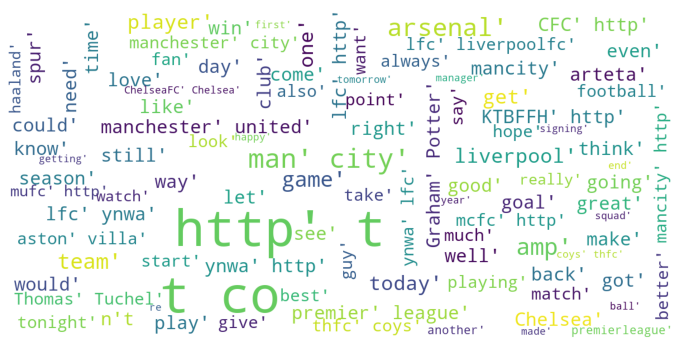

In [25]:
plot_wordcloud(tweetData['content'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    93080
True      4318
Name: verified, dtype: int64


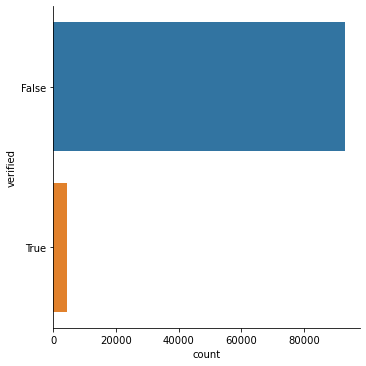

In [26]:
print(tweetData["verified"].value_counts())
sb.catplot(y = "verified", data = tweetData, kind = "count")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Argentina              35425
United States          19731
India                  11085
Zimbabwe                6781
Denmark                 6675
Australia               5775
Brazil                  2436
South Africa            2423
Kenya                   1157
New Zealand             1001
Germany                  692
Singapore                617
Ireland                  516
Egypt                    509
Japan                    421
Belgium                  288
France                   223
United Kingdom           222
Uruguay                  195
Mexico                   190
Norway                   170
South Korea              149
Sweden                   143
Italy                    132
Canada                    96
Switzerland               83
Nigeria                   79
Spain                     50
Trinidad and Tobago       49
Peru                      39
Croatia                   23
Netherlands               21
Portugal                   1
El Salvador                1
Name: country,

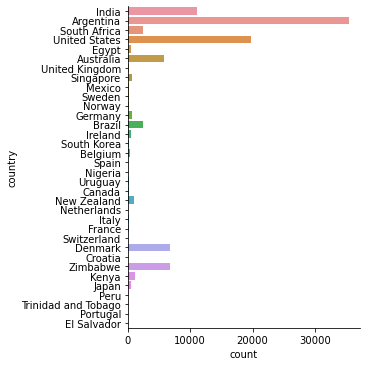

In [27]:
print(tweetData["country"].value_counts())
sb.catplot(y = "country", data = tweetData, kind = "count")